<a href="https://colab.research.google.com/github/visith1577/Machine-learning-first-projects/blob/main/DogsVsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-01-29 13:53:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c09::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  72.1MB/s    in 0.9s    

2021-01-29 13:53:29 (72.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Get data and send them to directories

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_cat_fnames[:10])
print(train_dogs_fnames[:10])

['cat.354.jpg', 'cat.137.jpg', 'cat.30.jpg', 'cat.104.jpg', 'cat.582.jpg', 'cat.41.jpg', 'cat.329.jpg', 'cat.358.jpg', 'cat.472.jpg', 'cat.819.jpg']
['dog.382.jpg', 'dog.435.jpg', 'dog.73.jpg', 'dog.69.jpg', 'dog.764.jpg', 'dog.477.jpg', 'dog.690.jpg', 'dog.420.jpg', 'dog.459.jpg', 'dog.144.jpg']


In [5]:
print("Total cat training images: ", len(os.listdir( train_cats_dir)))
print("Total dog training images: ", len(os.listdir( train_dogs_dir)))
print("Total cat testing images: ", len(os.listdir( validation_cats_dir)))
print("Total dog testing images: ", len(os.listdir( validation_dogs_dir)))

Total cat training images:  1000
Total dog training images:  1000
Total cat testing images:  500
Total dog testing images:  500


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows=4
ncols=4

pic_index=0

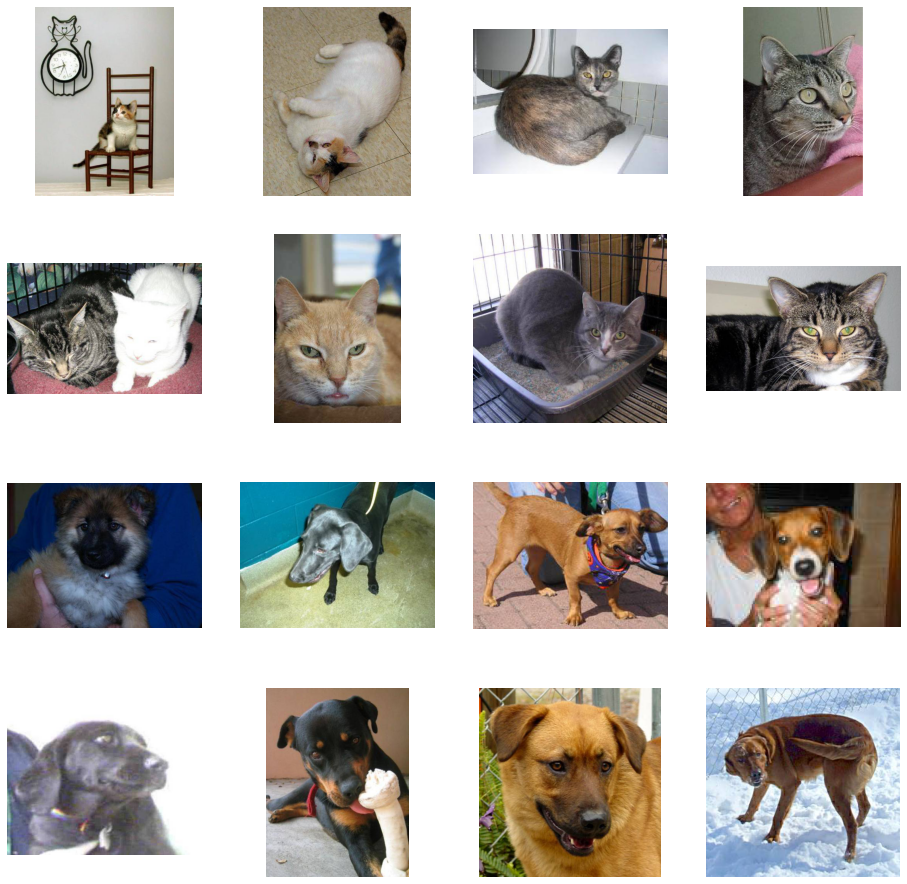

In [7]:
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') #

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       36992     
_________________________________________________________________
flatten (Flatten)            (None, 147968)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255) 
                                   

In [18]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')


test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit(train_generator,
                              validation_data=test_generator,
                              steps_per_epoch=100,
                              epochs=25,
                              validation_steps=50,
                              verbose=2)

Epoch 1/25
100/100 - 15s - loss: 0.4955 - accuracy: 0.7575 - val_loss: 0.5109 - val_accuracy: 0.7440
Epoch 2/25
100/100 - 15s - loss: 0.4710 - accuracy: 0.7785 - val_loss: 0.5171 - val_accuracy: 0.7420
Epoch 3/25
100/100 - 15s - loss: 0.4789 - accuracy: 0.7730 - val_loss: 0.5081 - val_accuracy: 0.7390
Epoch 4/25
100/100 - 15s - loss: 0.4678 - accuracy: 0.7770 - val_loss: 0.5163 - val_accuracy: 0.7310
Epoch 5/25
100/100 - 15s - loss: 0.4669 - accuracy: 0.7815 - val_loss: 0.4978 - val_accuracy: 0.7510
Epoch 6/25
100/100 - 15s - loss: 0.4639 - accuracy: 0.7775 - val_loss: 0.4949 - val_accuracy: 0.7480
Epoch 7/25
100/100 - 15s - loss: 0.4531 - accuracy: 0.7900 - val_loss: 0.4993 - val_accuracy: 0.7420
Epoch 8/25
100/100 - 15s - loss: 0.4495 - accuracy: 0.7905 - val_loss: 0.4983 - val_accuracy: 0.7600
Epoch 9/25
100/100 - 15s - loss: 0.4521 - accuracy: 0.7920 - val_loss: 0.4899 - val_accuracy: 0.7670
Epoch 10/25
100/100 - 15s - loss: 0.4594 - accuracy: 0.7825 - val_loss: 0.4838 - val_accura

In [21]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving German-shepherd.jpg to German-shepherd.jpg
[1.]
German-shepherd.jpg is a dog
